In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split


In [33]:
h = pd.read_csv('./salary.csv')
h.isna()

,Position,Level,Salary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12')])

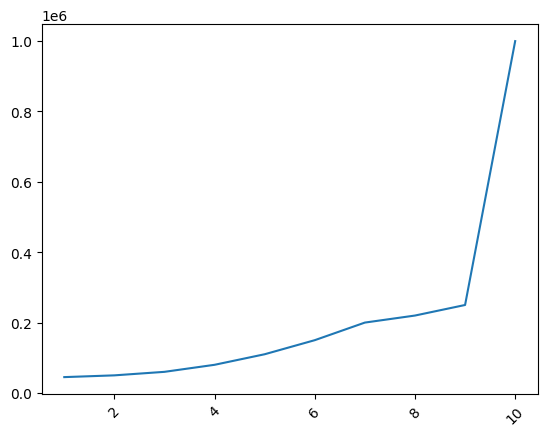

In [15]:
plt.plot(h['Level '],h['Salary'])
plt.xticks(rotation=45)

In [18]:
import numpy as np
X = h[['Level ']].values.astype(np.float32)
y = h['Salary'].values.astype(np.float32)

In [20]:
print(X)
print(y)

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
[  45000.   50000.   60000.   80000.  110000.  150000.  200000.  220000.
  250000. 1000000.]


In [56]:
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)
import torch.nn.functional as F
X_tensor = F.normalize(X_tensor,dim=0) #! because my value is too high, i need to normalize!
y_tensor = F.normalize(X_tensor,dim=0)
degree = 2  # Choose the degree of the polynomial
poly_features = torch.cat([X_tensor ** d for d in range(1, degree + 1)], dim=1) #! this means w1*x**2 + w2 ** x. dim=1 la co 2 cot, dim=0 la 1 cot
#! neu dim=0 thi x la 20,1, y la 10,1 -> khong duoc!
print(poly_features.shape)
print(y_tensor.shape)

torch.Size([20, 1])
torch.Size([10, 1])


In [38]:
from sklearn.model_selection import train_test_split

#! Nhét xtrain vào poly feature. Lúc này X_train là có 10,2.
X_train, X_test, y_train, y_test = train_test_split(poly_features.numpy(), y, test_size=0.8, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test)

In [39]:
print(X_train_tensor)

tensor([[0.2039, 0.0416],
        [0.3568, 0.1273]])


In [40]:
class PolynomialRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(PolynomialRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
model = PolynomialRegressionModel(degree)
print(model)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

PolynomialRegressionModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [41]:
for para in model.parameters():
    print(para)

Parameter containing:
tensor([[ 0.1910, -0.3608]], requires_grad=True)
Parameter containing:
tensor([-0.6172], requires_grad=True)


In [43]:
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    # for para in model.parameters():
    #     print(para)
    optimizer.step()

    # Print progress
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 2355788800.0000
Epoch [200/1000], Loss: 2289827840.0000
Epoch [300/1000], Loss: 2225713152.0000
Epoch [400/1000], Loss: 2163394048.0000
Epoch [500/1000], Loss: 2102819584.0000
Epoch [600/1000], Loss: 2043941632.0000
Epoch [700/1000], Loss: 1986710656.0000
Epoch [800/1000], Loss: 1931084032.0000
Epoch [900/1000], Loss: 1877014016.0000
Epoch [1000/1000], Loss: 1824458112.0000


Test Loss: 82486943744.0000
[0.45868248 0.10192944 0.30578834 0.05096472 0.40771776 0.15289417
 0.5096472  0.2548236 ]
[ 250000.   50000.  150000.   45000.  220000.   60000. 1000000.  110000.]


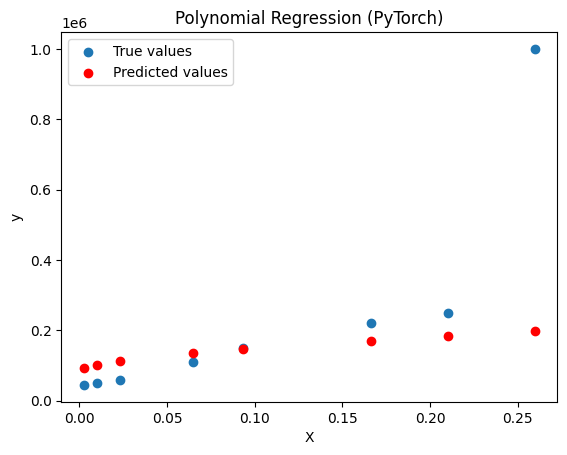

In [51]:





# Split the dataset into training and testing sets
# Adjust the test_size and random_state as needed


# Define a polynomial regression model


# Define loss function and optimizer


# Training loop


# Evaluate the model on the test set
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_loss = criterion(test_predictions, y_test_tensor.view(-1, 1))
    print(f'Test Loss: {test_loss.item():.4f}')

print(X_test[:,0])
print(y_test)
# Plot the results
with torch.no_grad():
    plt.scatter(X_test[:,1], y_test, label='True values')
    plt.scatter(X_test[:,1], test_predictions.numpy(), label='Predicted values', color='red')
    plt.title('Polynomial Regression (PyTorch)')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()
